In [2]:
import zstandard as zstd
import shutil
import os

def decompress_zst(input_file, output_file, max_samples):
    with open(input_file, 'rb') as compressed_file:
        decomp = zstd.ZstdDecompressor()
        with open(output_file, 'wb') as output:
            total_samples = 0
            for chunk in decomp.read_to_iter(compressed_file):
                output.write(chunk)
                total_samples += chunk.count(b'\n')
                if total_samples >= max_samples:
                    break

# List of input files
input_files = ['/Users/shivanipaunikar/Downloads/Project- crypto/Algorand/AC.zst', '/Users/shivanipaunikar/Downloads/Project- crypto/Algorand/AS.zst']

# Output directory where decompressed files will be stored
output_directory = '/Users/shivanipaunikar/Downloads/Project- crypto/output'

# Maximum number of samples you want to use
max_samples = 5000

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Loop through each input file and decompress
for input_file in input_files:
    # Generate the output file path by removing the .zst extension and adding .json
    output_file = os.path.join(output_directory, os.path.splitext(os.path.basename(input_file))[0] + '.json')
    
    print(f"Processing: {input_file}")
    
    # Decompress the input file, limiting to max_samples, and save it to the output file path
    decompress_zst(input_file, output_file, max_samples)
    
    print(f"Completed: {input_file} -> {output_file}")

print("All files processed.")


Processing: /Users/shivanipaunikar/Downloads/Project- crypto/Algorand/AC.zst
Completed: /Users/shivanipaunikar/Downloads/Project- crypto/Algorand/AC.zst -> /Users/shivanipaunikar/Downloads/Project- crypto/output/AC.json
Processing: /Users/shivanipaunikar/Downloads/Project- crypto/Algorand/AS.zst
Completed: /Users/shivanipaunikar/Downloads/Project- crypto/Algorand/AS.zst -> /Users/shivanipaunikar/Downloads/Project- crypto/output/AS.json
All files processed.


In [4]:
import pandas as pd
import json
import os

# Define the output directory where the JSON files were decompressed
output_directory = '/Users/shivanipaunikar/Downloads/Project- crypto/output'

# Function to fix JSON syntax errors
def fix_json_syntax(input_file, output_file):
    with open(input_file, 'r') as input_json, open(output_file, 'w') as output_json:
        for line in input_json:
            try:
                json_obj = json.loads(line)
                corrected_line = json.dumps(json_obj) + '\n'
                output_json.write(corrected_line)
            except json.JSONDecodeError as e:
                # Handle JSON syntax errors here or simply skip problematic lines
                print(f"Skipping line due to JSON syntax error: {line.strip()}")
                continue

# Specify your input and output file paths for fixing 'Ds.json' syntax
input_file_path_AS = os.path.join(output_directory, 'AS.json')
output_file_path_AS = os.path.join(output_directory, 'AS_fixed.json')

# Call the function to fix JSON syntax errors in 'Bs.json'
fix_json_syntax(input_file_path_AS, output_file_path_AS)

# Specify your input and output file paths for fixing 'Bc.json' syntax
input_file_path_AC = os.path.join(output_directory, 'AC.json')
output_file_path_AC = os.path.join(output_directory, 'AC_fixed.json')

# Call the function to fix JSON syntax errors in 'Bc.json'
fix_json_syntax(input_file_path_AC, output_file_path_AC)

# Define a function to read JSON data line by line
def read_json_lines(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            yield json.loads(line)

# Use os.path.join to construct file paths
submission_data = list(read_json_lines(output_file_path_AS))  
comment_data = list(read_json_lines(output_file_path_AC))  

# Create DataFrames
submission_df = pd.DataFrame(submission_data)
comment_df = pd.DataFrame(comment_data)

# Filter for Dogecoin-related data (you may need to adjust the filter)
Algorand_submissions = submission_df[submission_df['title'].str.contains('Algorand', case=False, na=False)]
Algorand_comments = comment_df[comment_df['body'].str.contains('Algorand', case=False, na=False)]

# Sample 5000 observations with replacement
Algorand_submissions_sample = Algorand_submissions.sample(n=5000, replace=True)
Algorand_comments_sample = Algorand_comments.sample(n=5000, replace=True)

# Export to CSV
Algorand_submissions_sample.to_csv('Algorand_submissions_sample.csv', index=False)
Algorand_comments_sample.to_csv('Algorand_comments_sample.csv', index=False)


Skipping line due to JSON syntax error: {"all_awardings":[{"award_sub_type":"GLOBAL","award_type":"global","awardings_required_to_grant_benefits":null,"coin_price":125,"coin_reward":0,"count":1,"days_of_drip_extension":0,"days_of_premium":0,"description":"When you come across a feel-good thing.","end_date":null,"giver_coin_reward":null,"icon_format":null,"icon_height":2048,"icon_url":"https:\/\/i.redd.it\/award_images\/t5_22cerq\/5izbv4fn0md41_Wholesome.png","icon_width":2048,"id":"award_5f123e3d-4f48-42f4-9c11-e98b566d5897","is_enabled":true,"is_new":false,"name":"Wholesome","penny_donate":null,"penny_price":null,"resized_icons":[{"height":16,"url":"https:\/\/preview.redd.it\/award_images\/t5_22cerq\/5izbv4fn0md41_Wholesome.png?width=16&amp;height=16&amp;auto=webp&amp;s=92932f465d58e4c16b12b6eac4ca07d27e3d11c0","width":16},{"height":32,"url":"https:\/\/preview.redd.it\/award_images\/t5_22cerq\/5izbv4fn0md41_Wholesome.png?width=32&amp;height=32&amp;auto=webp&amp;s=d11484a208d68a318bf9d

In [6]:
# Load the CSV files
Algorand_submissions_df = pd.read_csv('Algorand_submissions_sample.csv')
Algorand_comments_df = pd.read_csv('Algorand_comments_sample.csv')


In [7]:
# Display the columns of the DataFrame
print("Columns in Algorand_submissions_df:")
print(Algorand_submissions_df.columns)

# Display a sample of the DataFrame
print("Sample data in Algorand_submissions_df:")
print(Algorand_submissions_df.head())

# Repeat the same for Dogecoin_comments_df if needed
print("Columns in Algorand_comments_df:")
print(Algorand_comments_df.columns)

print("Sample data in Algorand_comments_df:")
print(Algorand_comments_df.head())


Columns in Algorand_submissions_df:
Index(['archived', 'author', 'author_flair_css_class', 'author_flair_text',
       'brand_safe', 'contest_mode', 'created_utc', 'distinguished', 'domain',
       'edited',
       ...
       'crosspost_parent', 'crosspost_parent_list', 'upvote_ratio',
       'is_created_from_ads_ui', 'retrieved_utc', 'top_awarded_type',
       'url_overridden_by_dest', 'poll_data', 'gallery_data', 'is_gallery'],
      dtype='object', length=119)
Sample data in Algorand_submissions_df:
  archived                author  author_flair_css_class  author_flair_text  \
0     True              Some_won                     NaN                NaN   
1    False  merica-RGtna3NrYgk91                     NaN                NaN   
2    False             [deleted]                     NaN                NaN   
3    False             Cathesdus                     NaN                NaN   
4    False         PackingTape01                     NaN                NaN   

  brand_safe  con

In [8]:
import pandas as pd

# Load the data into DataFrames (assuming you already have them loaded)
Algorand_submissions_df = pd.read_csv('Algorand_submissions_sample.csv')
Algorand_comments_df = pd.read_csv('Algorand_comments_sample.csv')

# Convert 'created_utc' columns to datetime objects
Algorand_submissions_df['created_utc'] = pd.to_datetime(Algorand_submissions_df['created_utc'], unit='s')
Algorand_comments_df['created_utc'] = pd.to_datetime(Algorand_comments_df['created_utc'], unit='s')

# Calculate the range of dates available
date_range_submissions = Algorand_submissions_df['created_utc'].min(), Algorand_submissions_df['created_utc'].max()
date_range_comments = Algorand_comments_df['created_utc'].min(), Algorand_comments_df['created_utc'].max()

print("Range of dates available in Algorand_submissions_df:", date_range_submissions)
print("Range of dates available in Algorand_comments_df:", date_range_comments)

# Calculate the number of posts, comments, and authors for each day
posts_per_day_submissions = Algorand_submissions_df.groupby(Algorand_submissions_df['created_utc'].dt.date).size()
comments_per_day = Algorand_comments_df.groupby(Algorand_comments_df['created_utc'].dt.date).size()
unique_authors_per_day_submissions = Algorand_submissions_df.groupby(Algorand_submissions_df['created_utc'].dt.date)['author'].nunique()

# Display the results
print("\nNumber of posts per day in Algorand_submissions_df:")
print(posts_per_day_submissions)
print("\nNumber of comments per day in Algorand_comments_df:")
print(comments_per_day)
print("\nNumber of unique authors per day in Algorand_submissions_df:")
print(unique_authors_per_day_submissions)


Range of dates available in Algorand_submissions_df: (Timestamp('2017-07-26 20:31:04'), Timestamp('2021-06-03 13:59:10'))
Range of dates available in Algorand_comments_df: (Timestamp('2017-06-26 20:39:40'), Timestamp('2021-02-13 18:16:21'))

Number of posts per day in Algorand_submissions_df:
created_utc
2017-07-26     7
2018-03-17     3
2018-07-14     2
2018-07-18     4
2018-10-10     6
              ..
2021-05-30    11
2021-05-31    18
2021-06-01    43
2021-06-02    54
2021-06-03    26
Length: 378, dtype: int64

Number of comments per day in Algorand_comments_df:
created_utc
2017-06-26      9
2018-06-19      8
2018-07-18      9
2019-01-09     11
2019-02-23     13
             ... 
2021-02-09    209
2021-02-10    202
2021-02-11    291
2021-02-12    375
2021-02-13    344
Length: 182, dtype: int64

Number of unique authors per day in Algorand_submissions_df:
created_utc
2017-07-26     1
2018-03-17     1
2018-07-14     1
2018-07-18     1
2018-10-10     1
              ..
2021-05-30     3

# Topic Modeling

In [9]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import models
import gensim.corpora as corpora
import gensim

In [10]:
# Load the data into DataFrames (assuming you already have them loaded)
Algorand_submissions_df = pd.read_csv('Algorand_submissions_sample.csv')
Algorand_comments_df = pd.read_csv('Algorand_comments_sample.csv')

# Convert 'created_utc' columns to datetime objects
Algorand_submissions_df['created_utc'] = pd.to_datetime(Algorand_submissions_df['created_utc'], unit='s')
Algorand_comments_df['created_utc'] = pd.to_datetime(Algorand_comments_df['created_utc'], unit='s')

# Combine comments and submissions text
Algorand_text = Algorand_submissions_df['selftext'].dropna().tolist() + Algorand_comments_df['body'].dropna().tolist()


In [11]:
# Text preprocessing
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum()]
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

Algorand_text = [preprocess_text(text) for text in Algorand_text]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shivanipaunikar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shivanipaunikar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000)

In [13]:
# Apply TF-IDF vectorization
Algorand_tfidf = tfidf_vectorizer.fit_transform([' '.join(tokens) for tokens in Algorand_text])

In [14]:
pip install gensim matplotlib pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [15]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import matplotlib.pyplot as plt

# Assuming you have a list of preprocessed tokens called 'bitcoin_text'
# You can replace 'bitcoin_text' with your actual data
dictionary = Dictionary([tokens for tokens in Algorand_text])
corpus = [dictionary.doc2bow(tokens) for tokens in Algorand_text]

# Perform LDA topic modeling
lda_model_Algorand = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=2)

In [16]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model_Algorand, texts=Algorand_text, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_lda:.4f}')


Coherence Score: 0.4361


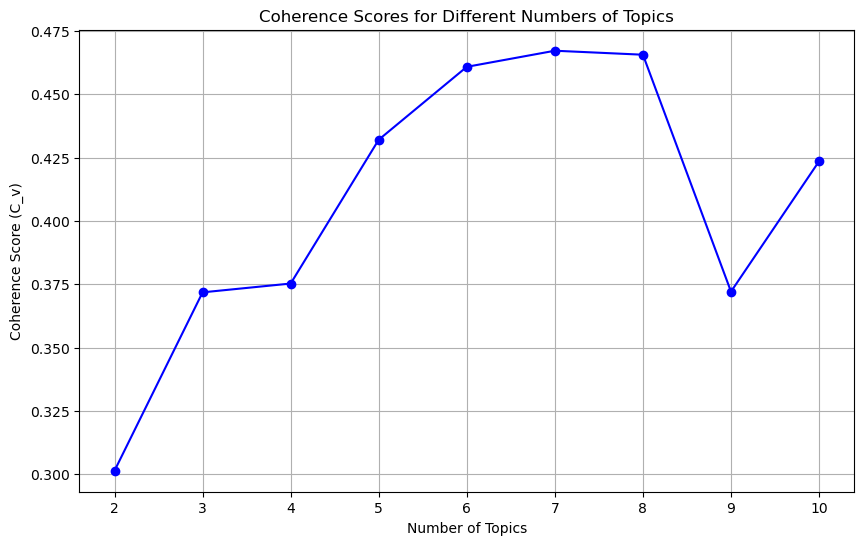

In [17]:
# Define a range of topic numbers to test
topics_range = range(2, 11)
coherence_scores = []

# Calculate coherence scores for different numbers of topics
for num_topics in topics_range:
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=2)
    coherence_model = CoherenceModel(model=lda_model, texts=Algorand_text, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

# Plot the coherence scores
plt.figure(figsize=(10, 6))
plt.plot(topics_range, coherence_scores, marker='o', linestyle='-', color='b')
plt.title('Coherence Scores for Different Numbers of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score (C_v)')
plt.xticks(topics_range)
plt.grid(True)
plt.show()


In [18]:
# Print the topics generated by the LDA model
topics = lda_model_Algorand.print_topics(num_words=7)  # You can adjust the number of words per topic
for topic in topics:
    print(topic)


(0, '0.031*"algorand" + 0.013*"node" + 0.008*"http" + 0.008*"like" + 0.007*"ha" + 0.007*"algo" + 0.007*"relay"')
(1, '0.036*"http" + 0.025*"algorand" + 0.024*"reward" + 0.014*"node" + 0.010*"amp" + 0.009*"algo" + 0.008*"staking"')
(2, '0.059*"http" + 0.024*"amp" + 0.023*"algorand" + 0.020*"welcome" + 0.018*"community" + 0.017*"subreddit" + 0.016*"meme"')
(3, '0.027*"algorand" + 0.014*"algo" + 0.012*"market" + 0.011*"coin" + 0.011*"price" + 0.008*"block" + 0.007*"ha"')
(4, '0.050*"algorand" + 0.034*"wallet" + 0.019*"http" + 0.017*"coinbase" + 0.015*"algo" + 0.010*"official" + 0.009*"reward"')


# Sentiment Analysis

In [19]:
from textblob import TextBlob

Algorand_text = Algorand_submissions_df['selftext'].dropna().tolist() + Algorand_comments_df['body'].dropna().tolist()

# Preprocess the text data (if you haven't done this already)
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum()]
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)  # Join tokens into a single string

Algorand_text = [preprocess_text(text) for text in Algorand_text]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shivanipaunikar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shivanipaunikar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
# Example preprocessing using NLTK
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

# Define a function to preprocess text
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]
    
    # Other text cleaning steps (e.g., removing punctuation, stemming) can be added
    
    return " ".join(tokens)  # Convert tokens back to text

# Apply preprocessing to your text data
Algorand_comments_df['cleaned_text'] = Algorand_comments_df['body'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shivanipaunikar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shivanipaunikar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
# Define a function to get sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity

    if polarity > 0.1:
        return "positive"
    elif polarity < -0.1:
        return "negative"
    else:
        return "neutral"

In [22]:
# Apply sentiment analysis to your preprocessed text data
sentiments = [get_sentiment(text) for text in Algorand_text]


In [23]:
# Create a DataFrame to store sentiments (optional)
sentiments_df = pd.DataFrame({'Sentiment': sentiments})

In [24]:
# Print or analyze the sentiment results as needed
print(sentiments_df['Sentiment'].value_counts())  # Display sentiment counts

neutral     4106
positive    3187
negative     430
Name: Sentiment, dtype: int64


In [26]:
# Assuming you have already performed sentiment analysis and stored results in 'sentiments' list
# Combine both comments and submissions text into a single list
Algorand_text = Algorand_submissions_df['selftext'].dropna().tolist() + Algorand_comments_df['body'].dropna().tolist()


# Print the first few comments and submissions with their sentiments
for i, (text, sentiment) in enumerate(zip(Algorand_text, sentiments)):
    if i >= 10:  # Print the first 10 (5 comments + 5 submissions)
        break
    if i < 5:
        print(f"Comment {i + 1}:")
    else:
        print(f"Submission {i - 4}:")
    print("Text:", text)
    print("Sentiment:", sentiment)
    print()


Comment 1:
Text: [deleted]
Sentiment: neutral

Comment 2:
Text: Why would Algorand be better than similar blockchains like Cardano, Polkadot, Solana, and One Harmony?

Algorand touts that it is secure, scalable and decentralized, but from what I can tell, so are the ones mentioned above.

The one thing I notice is that Algorand mentions that it cannot be forked. But other than this, I don't see why Algorand would be superior.

Asking to learn and possibly invest
Sentiment: positive

Comment 3:
Text: Do you guys think the value of Algorand is undervalued based on the project and its comparison to Bitcoin? Like... it’s market cap and coin in circulation comparison.
Sentiment: neutral

Comment 4:
Text: [removed]
Sentiment: neutral

Comment 5:
Text: I wrote this article to explain how Algorand Multisig works and what's different from other cryptocurrency's implementations:

[https://twitter.com/pipaman/status/1154080072766238721](https://twitter.com/pipaman/status/1154080072766238721)

At 

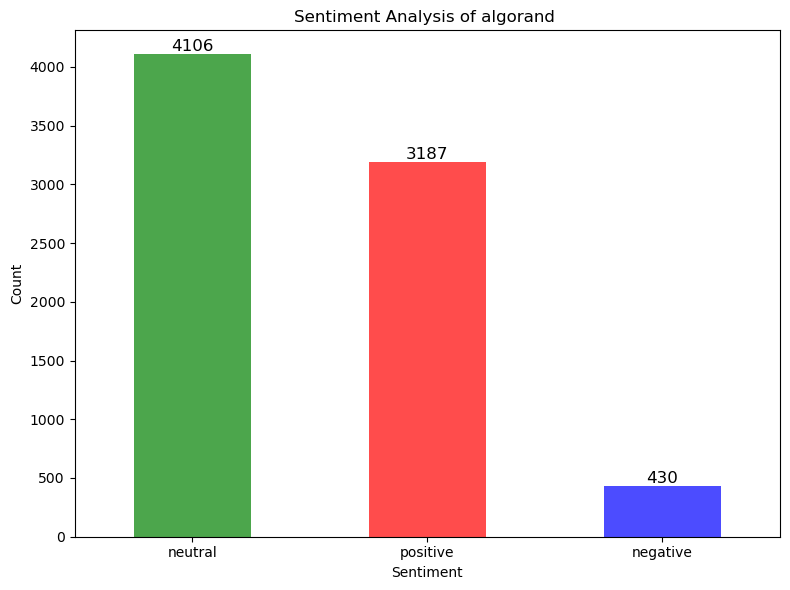

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already performed sentiment analysis and have a DataFrame 'sentiments_df'
# with a 'Sentiment' column containing sentiment labels (positive, negative, neutral)

# Count the occurrences of each sentiment label
sentiment_counts = sentiments_df['Sentiment'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'], alpha=0.7)
plt.title('Sentiment Analysis of algorand ')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Annotate the bars with counts
for i, count in enumerate(sentiment_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

# Show the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Emotion Analysis

In [28]:
pip install transformers torch

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

# Load the pre-trained emotion classification model and tokenizer
model_name = "michellejieli/emotion_text_classifier"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Combine both comments and submissions text into a single list
Algorand_text = Algorand_submissions_df['selftext'].dropna().tolist() + Algorand_comments_df['body'].dropna().tolist()


In [ ]:
def get_emotion(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        logits = model(**inputs).logits
    predicted_class = torch.argmax(logits, dim=1).item()
    
    # Define the emotion labels corresponding to model output
    emotion_labels = ["anger", "fear", "joy", "sadness", "surprise"]
    return emotion_labels[predicted_class]

In [ ]:
algorand_combined_df['emotion'] = combined_text.apply(get_emotion)